
## Basic Image operations

In [ ]:
import sys, os
if 'google.colab' in sys.modules:
  if os.getcwd() == '/content':
    !git clone 'https://github.com/inb-luebeck/cs4250.git'
    os.chdir('cs4250')

Cloning into 'cs4250'...
remote: Enumerating objects: 51, done.
remote: Counting objects: 100% (51/51), done.
remote: Compressing objects: 100% (39/39), done.
remote: Total 51 (delta 11), reused 44 (delta 8), pack-reused 0
Unpacking objects: 100% (51/51), done.


In [ ]:
import cv2 # open cv
import matplotlib.pyplot as plt # plotting tools
import numpy as np # matrix, array operations
import glob # getting path of the png images from the data at once

from google.colab.patches import cv2_imshow # showing th images
from os.path import join # combine different items to a path
from os import getcwd, listdir # shows the current directory, lists items in a directory

# show plots when running cell
%matplotlib inline 


### Loading and displaying images in Python

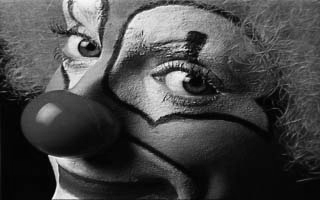

In [ ]:
# : define image path
img_path = "/content/cs4250/data/exercise_1/clown.png"

# : read image
img = cv2.imread(img_path)

# : convert image to grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# : display image
cv2_imshow(img_gray)


### Image gradients

In [ ]:
def load_gray_normalized(imgs_path):
    imgs = []
    for img_path in imgs_path:
      img = img = cv2.imread(img_path)
      img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
      img_gray_norm = img_gray/img_gray.max().astype(np.float64)
      imgs.append(img_gray_norm)

    return np.array(imgs, dtype=object)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


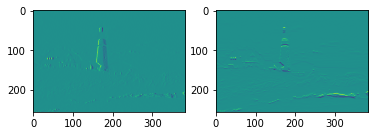

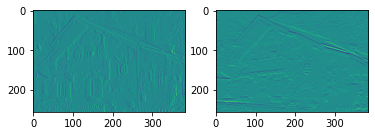

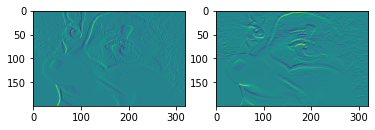

In [ ]:
# : load image
imgs_path = glob.glob('/content/cs4250/data/exercise_1/*.png')
imgs = load_gray_normalized(imgs_path)

# : define kernels
kernels = []
kernels.append(np.array([-1,0,1]).reshape(1,3))
kernels.append(np.array([-1,0,1]).reshape(3,1))

# : filter images
imgs_filtered = []
for img in imgs:
    for kernel in kernels:
        img_filtered = cv2.filter2D(img, -1, kernel)
        imgs_filtered.append(img_filtered)

imgs_filtered = np.array(imgs_filtered)

# : display images
imgs_len = len(imgs)
kernel_len = len(kernels)
for img_number in range(imgs_len):
    fig, axs = plt.subplots(1,kernel_len)
    for kernel_number in range(kernel_len):    
        axs[kernel_number].imshow(imgs_filtered[kernel_len * img_number + kernel_number])

### Normalize

In [ ]:
def display_with_hist(image):
  image_max1 = image/image.max()
  fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
  axs[0].imshow(image, aspect='auto')
  axs[1].hist(image_max1.flatten())
  fig.tight_layout(pad=3.0)

In [ ]:
def normalized_to_uint8(image):
  return image.astype(np.uint8)

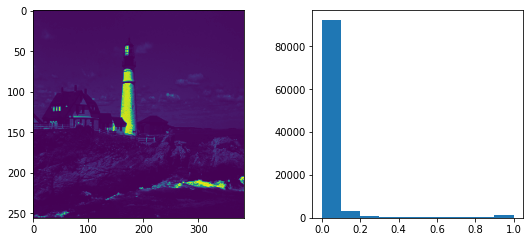

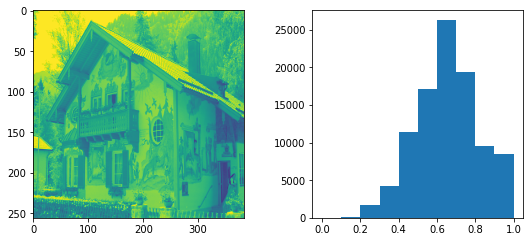

In [ ]:
# : load images
img1 = cv2.imread("/content/cs4250/data/exercise_1/ueb131.png")
img2 = cv2.imread("/content/cs4250/data/exercise_1/ueb132.png")

img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# : display images with histograms
display_with_hist(img1_gray)
display_with_hist(img2_gray)

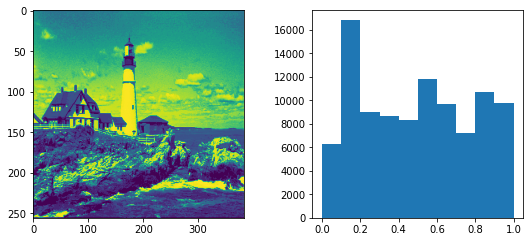

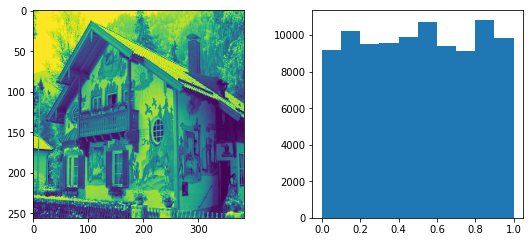

In [ ]:
# : convert images to uint8
img1_uint8 = normalized_to_uint8(img1_gray)
img2_uint8 = normalized_to_uint8(img2_gray)

# : equalize histogram and display
img1_eq = cv2.equalizeHist(img1_uint8)
img2_eq = cv2.equalizeHist(img2_uint8)
display_with_hist(img1_eq)
display_with_hist(img2_eq)